## Define test method

In [11]:
from datetime import datetime
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

import gym
import pygame
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from IPython.display import clear_output
from IPython import display
os.environ["SDL_VIDEODRIVER"] = "dummy"

import a2cagent

In [12]:
def test(num_episodes=10, env_str="CartPole-v1", policy='', activation_function="relu", initializer="normal", state_normalization=False, batch_normalization=False, use_existing_policy=True, specification=""):
    # load environment
    env = gym.make(env_str)
    s0 = env.reset(return_info=False)
    s0 = env.reset()

    obs_dim = env.observation_space.shape[0]
    act_dim = env.action_space
    act_dim = 2  # has to be set manually

    # state normalisation
    state_space_samples = np.array(
        [env.observation_space.sample() for x in range(6400)])
    if (env_str == "CartPole-v1"):
        # sample-method does not yield reasonable results for CartPole, so we load some historical state data
        state_space_samples = np.loadtxt(os.getcwd()+"/obs-samples/norm_a.txt")

    # initiate agent
    model = a2cagent.A2CAgent(
        s0, act_dim, obs_dim, state_space_samples, state_normalization, batch_normalization, activation_function, initializer, use_existing_policy)
    # compile NN with inherited keras-method
    model.compile(optimizer=keras.optimizers.Adam(), loss=[
                  model.critic_loss, model.actor_loss])

    # load weights from existing model
    if use_existing_policy == True:
        # string in format 'A2C281120221423CartPole-v1_mish'
        model.train_on_batch(tf.stack(np.zeros((model.batch_size, model.obs_dim))), [
                             np.zeros((model.batch_size, 1)), np.zeros((model.batch_size, 2))])
        model.load_weights(
            model.my_path+'/training_discrete/' + policy+"/model/")

        """non WSL version"""
        # Tk().withdraw()
        # filename = askopenfilename()
        # model.load_weights(filename)

    # set up ModelCheckpoint
    model.model_path = model.my_path+'/test_discrete' + \
        f"/A2C{datetime.now().strftime('%d%m%Y%H%M')}" + \
        env_str+'_'+activation_function+'_'+initializer+'_'+specification
    os.makedirs(model.model_path+'/model/')

    # set up TensorBoard to visualize progress
    train_writer = tf.summary.create_file_writer(
        model.model_path + '/tensorboard')

    # main training loop
    episode_reward_sum = 0
    s = env.reset()
    episode = 1
    step = 0
    while (episode <= num_episodes):
        # obtain action distibution
        _, policy_logits = model(s.reshape(1, -1))
        a_t, V_t = model.action_value(s.reshape(1, -1))  # choose action
        s_new, reward, done, _ = env.step(a_t.numpy()[0])  # make step

        # render1 - in jupyter notebook
        if env_str == "CartPole-v1":
            if (step % (model.render_size) == 0):
                clear_output(wait=True)
                x = env.render(mode='rgb_array')
                plt.imshow(x)
                plt.show()
        # else:
        #     if (step % model.render_size == 0):
        #         clear_output(wait=True)
        #         x = env.render(mode='rgb_array')
        #         plt.imshow(x)
        #         plt.show()

        episode_reward_sum += reward

        s = s_new

        # handle end of episode
        if done:
            s = env.reset()
            with train_writer.as_default():
                tf.summary.scalar('rewards', episode_reward_sum, episode)

            episode_reward_sum = 0
            episode += 1

    env.close()

# Watch the unoptimized discrete agent learn to solve CartPole-v1
## ..after X steps

blablbla

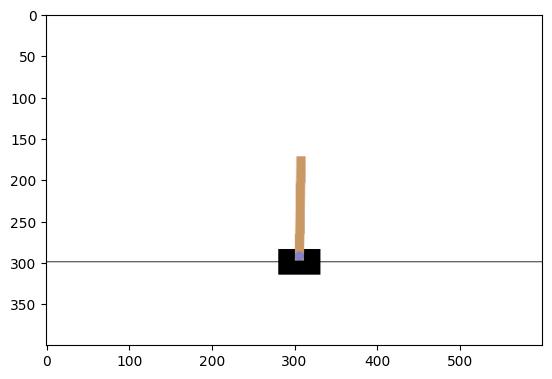

KeyboardInterrupt: 

In [13]:
test(num_episodes=5, env_str="CartPole-v1", policy="A2C111220221544CartPole-v1_mish_normal_DELETE",
     specification="test_run1", state_normalization=False, batch_normalization=False, use_existing_policy=True)

## ..after X steps

blablbla

In [14]:
test(num_episodes=5, env_str="CartPole-v1", policy="A2C111220221544CartPole-v1_mish_normal_DELETE",
     specification="test_run2", state_normalization=False, batch_normalization=False, use_existing_policy=True)

KeyboardInterrupt: 

## ..after X steps

blablbla

In [15]:
test(num_episodes=5, env_str="CartPole-v1", policy="A2C111220221544CartPole-v1_mish_normal_DELETE",
     specification="test_run3", state_normalization=False, batch_normalization=False, use_existing_policy=True)

FileExistsError: [Errno 17] File exists: '/home/grube/CSE/194.077-Applied-Deep-Learning/test_discrete/A2C111220221556CartPole-v1_relu_normal_test_run/model/'

.... I tried to optimize the learning process using normalisations, different activation and weight initialization functions and so on...

# How fast can the optimized agent learn in comparisson to the base version?